In [1]:
import grib2io
import numpy as np
import xarray as xr
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib
matplotlib.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (10,8),
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

## grib2io

In [3]:

adam_dat_dir = '/scratch1/NCEPDEV/mdl/Adam.Schnapp/noscrub/data/gefs/20230129/atmos/'
g = grib2io.open(adam_dat_dir+'gep06.t12z.pgrb2ab.0p50')

fa = adam_dat_dir+'gep06.t12z.pgrb2ab.0p50'

In [5]:
print(g)

mode = rb
name = /scratch1/NCEPDEV/mdl/Adam.Schnapp/noscrub/data/gefs/20230129/atmos/gep06.t12z.pgrb2ab.0p50
messages = 38304
current_message = 0
size = 7284523833
closed = False
variables = ('4LFTX', '5WAVH', 'ABSV', 'ACPCP', 'ALBDO', 'APCP', 'APTMP', 'BRTMP', 'CAPE', 'CDUVB', 'CFRZR', 'CICEP', 'CIN', 'CLMR', 'CNWAT', 'CPOFP', 'CPRAT', 'CRAIN', 'CSNOW', 'CWAT', 'CWORK', 'DLWRF', 'DPT', 'DSWRF', 'DUVB', 'FLDCP', 'FRICV', 'GFLUX', 'GUST', 'HGT', 'HINDEX', 'HLCY', 'HPBL', 'ICAHT', 'ICEC', 'ICETK', 'ICIP', 'ICSEV', 'LAND', 'LFT X', 'LHTFL', 'MNTSF', 'MSLET', 'NCPCP', 'O3MR', 'PEVPR', 'PLI', 'PLPL', 'POT', 'PRATE', 'PRES', 'PRMSL', 'PVORT', 'PWAT', 'RH', 'SFCR', 'SHTFL', 'SNOD', 'SNOHF', 'SNOWC', 'SOILL', 'SOILW', 'SPFH', 'SUNSD', 'TCDC', 'TMAX', 'TMIN', 'TMP', 'TOZNE', 'TSOIL', 'U-GWD', 'UFLX', 'UGRD', 'ULWRF', 'USTM', 'USWRF', 'V-GWD', 'VFLX', 'VGRD', 'VIS', 'VRATE', 'VSTM', 'VVEL', 'VWSH', 'WATR', 'WEASD', 'WILT')
levels = ('0-0.1 m underground', '0.1-0.4 m underground', '0.33-1 sigma l

In [6]:
msgs = g['TMP']

0:d=2023-01-29 12:00:00:HGT:Geopotential Height (gpm):10 mb:0:00:00


In [6]:
msg.level

'10 mb'

In [62]:
msg[0].fullName

'Snow Phase Change Heat Flux'

In [66]:
g.variables

('4LFTX',
 '5WAVH',
 'ABSV',
 'ACPCP',
 'ALBDO',
 'APCP',
 'APTMP',
 'BRTMP',
 'CAPE',
 'CDUVB',
 'CFRZR',
 'CICEP',
 'CIN',
 'CLMR',
 'CNWAT',
 'CPOFP',
 'CPRAT',
 'CRAIN',
 'CSNOW',
 'CWAT',
 'CWORK',
 'DLWRF',
 'DPT',
 'DSWRF',
 'DUVB',
 'FLDCP',
 'FRICV',
 'GFLUX',
 'GUST',
 'HGT',
 'HINDEX',
 'HLCY',
 'HPBL',
 'ICAHT',
 'ICEC',
 'ICETK',
 'ICIP',
 'ICSEV',
 'LAND',
 'LFT X',
 'LHTFL',
 'MNTSF',
 'MSLET',
 'NCPCP',
 'O3MR',
 'PEVPR',
 'PLI',
 'PLPL',
 'POT',
 'PRATE',
 'PRES',
 'PRMSL',
 'PVORT',
 'PWAT',
 'RH',
 'SFCR',
 'SHTFL',
 'SNOD',
 'SNOHF',
 'SNOWC',
 'SOILL',
 'SOILW',
 'SPFH',
 'SUNSD',
 'TCDC',
 'TMAX',
 'TMIN',
 'TMP',
 'TOZNE',
 'TSOIL',
 'U-GWD',
 'UFLX',
 'UGRD',
 'ULWRF',
 'USTM',
 'USWRF',
 'V-GWD',
 'VFLX',
 'VGRD',
 'VIS',
 'VRATE',
 'VSTM',
 'VVEL',
 'VWSH',
 'WATR',
 'WEASD',
 'WILT')

In [65]:
for short_name in g.variables:
    print(g.select(shortName=short_name)[0].fullName)

Best (4 layer) Lifted Index
5-Wave Geopotential Height
Absolute Vorticity
Convective Precipitation
Albedo
Total Precipitation
Apparent Temperature
Brightness Temperature
Convective Available Potential Energy
Clear sky UV-B Downward Solar Flux
Categorical Freezing Rain
Categorical Ice Pellets
Convective Inhibition
Cloud Mixing Ratio
Plant Canopy Surface Water
Percent frozen precipitation
Convective Precipitation Rate
Categorical Rain
Categorical Snow
Cloud Water
Cloud Work Function
Downward Long-Wave Rad. Flux
Dew Point Temperature
Downward Short-Wave Radiation Flux
UV-B Downward Solar Flux
Field Capacity
Frictional Velocity
Ground Heat Flux
Wind Speed (Gust)
Geopotential Height
Haines Index
Storm Relative Helicity
Planetary Boundary Layer Height
ICAO Standard Atmosphere Reference Height
Ice Cover
Ice Thickness
Icing
Icing Severity
Land Cover (0=sea, 1=land)
Surface Lifted Index
Latent Heat Net Flux
Montgomery Stream Function
MSLP (Eta model reduction)
Large-Scale Precipitation (non-con

In [37]:
msg = g.select(shortName='TMP')

In [33]:
np.shape(msg[0].data)

(361, 720)

In [30]:
np.shape(msg)

(4612,)

In [38]:
msg[10]

Section 0: discipline = 0 - Meteorological Products
Section 1: originatingCenter = 7 - US National Weather Service - NCEP (WMC)
Section 1: originatingSubCenter = 2 - NCEP Ensemble Products
Section 1: masterTableInfo = 2 - Version Implemented on 4 November 2003
Section 1: localTableInfo = 1 - Number of local table version used.
Section 1: significanceOfReferenceTime = 1 - Start of Forecast
Section 1: year = 2023
Section 1: month = 1
Section 1: day = 29
Section 1: hour = 12
Section 1: minute = 0
Section 1: second = 0
Section 1: refDate = 2023-01-29 12:00:00
Section 1: productionStatus = 0 - Operational Products
Section 1: typeOfData = 4 - Perturbed Forecast Products
Section 3: interpretationOfListOfNumbers = 0 - There is no appended list
Section 3: gridDefinitionTemplateNumber = 0 - Latitude/Longitude
Section 3: shapeOfEarth = 6 - Earth assumed spherical with radius = 6,371,229.0 m
Section 3: earthRadius = 6371229.0
Section 3: earthMajorAxis = None
Section 3: earthMinorAxis = None
Sectio

In [24]:
dat = msg[0].data

In [26]:
np.shape(dat)

(361, 720)

In [94]:
lats, lons = msg[0].grid()

In [6]:
from mpl_toolkits.basemap import Basemap
from pyproj import Proj
#m = Basemap(projection='lcc',lon_0=-100,lat_0=35,width=5e6,height=5e6,resolution='i')

In [119]:
Basemap?

In [125]:
xx, yy = m(lons, lats)

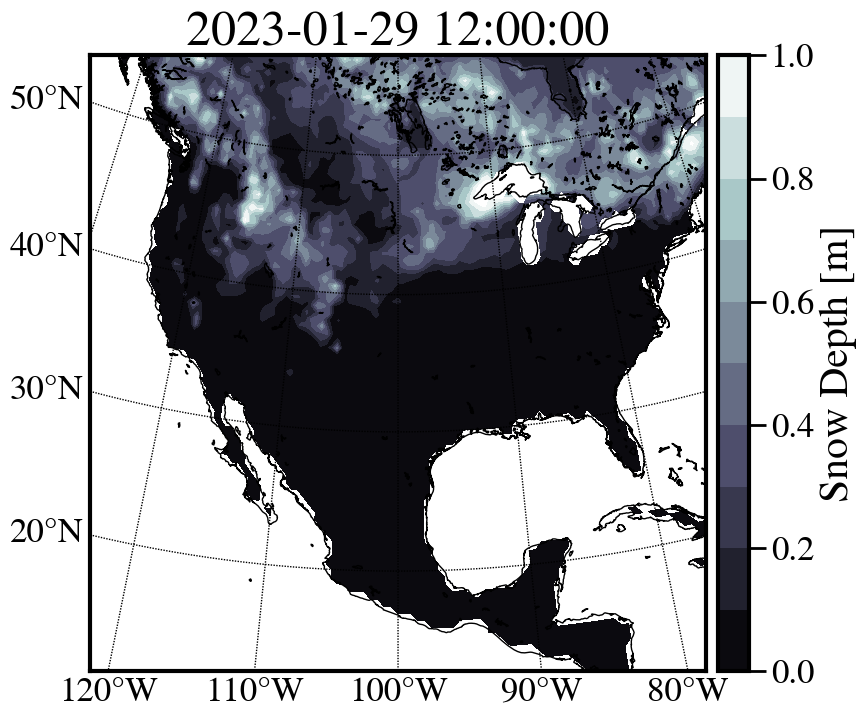

In [138]:
cs = m.contourf(xx,yy,dat,np.linspace(0,1,11),cmap=plt.cm.bone)
m.colorbar(location='right',label='Snow Depth [m]')

m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,10.), labels=[1,0,0,0],fontsize=25)
m.drawmeridians(np.arange(0.,360.,10.), labels=[0,0,0,1],fontsize=25)
plt.title(msg[0].refDate
         )
plt.show()

## xarray

In [47]:
filters = dict(productDefinitionTemplateNumber=1, typeOfFirstFixedSurface=1)

test = xr.open_dataset(adam_dat_dir+'gep06.t12z.pgrb2ab.0p50', engine='grib2io', filters=filters)

In [42]:
test.data_vars

Data variables:
    TMP      (leadTime, valueOfFirstFixedSurface, y, x) float32 ...

In [44]:
import metpy

In [81]:
np.timedelta64(0,'ns')

numpy.timedelta64(0,'ns')

In [87]:
test.TMP.data[test.leadTime == np.timedelta64(0,'ns'),test.valueOfFirstFixedSurface==2.0]

array([[[241.18053, 241.18053, 241.18053, ..., 241.18053, 241.18053,
         241.18053],
        [241.21053, 241.20052, 241.20052, ..., 241.23051, 241.22052,
         241.22052],
        [241.54053, 241.52052, 241.51053, ..., 241.56052, 241.55052,
         241.54053],
        ...,
        [241.56052, 241.56052, 241.56052, ..., 241.57053, 241.57053,
         241.57053],
        [241.17052, 241.17052, 241.17052, ..., 241.18053, 241.18053,
         241.17052],
        [241.03052, 241.03052, 241.03052, ..., 241.03052, 241.03052,
         241.03052]]], dtype=float32)

In [88]:
test.coords

Coordinates:
    refDate                   datetime64[ns] ...
  * leadTime                  (leadTime) timedelta64[ns] 0 days 00:00:00 ... ...
  * valueOfFirstFixedSurface  (valueOfFirstFixedSurface) float64 2.0 80.0 100.0
    perturbationNumber        int64 ...
    latitude                  (y, x) float64 ...
    longitude                 (y, x) float64 ...
    validDate                 (leadTime) datetime64[ns] ...

In [7]:
nbm_grid_def = test.grib2io.griddef()

In [8]:
nbm_grid = test.TMP.grib2io.interp('bilinear', nbm_grid_def)

#CAPE.grib2io.interp('bilinear', nbm_grid_def)

In [12]:
import pint

In [13]:
u = pint.UnitRegistry()

In [35]:
test.TMP

<xarray.DataArray 'TMP' (leadTime: 65, y: 361, x: 720)>
array([[[242.13872, 242.13872, ..., 242.13872, 242.13872],
        [241.93872, 241.93872, ..., 241.93872, 241.93872],
        ...,
        [239.33873, 239.33873, ..., 239.33873, 239.33873],
        [239.23872, 239.23872, ..., 239.23872, 239.23872]],

       [[241.03044, 241.03044, ..., 241.03044, 241.03044],
        [240.23045, 240.23045, ..., 240.23045, 240.23045],
        ...,
        [239.23045, 239.23045, ..., 239.23045, 239.23045],
        [239.03044, 239.03044, ..., 239.03044, 239.03044]],

       ...,

       [[241.63823, 241.63823, ..., 241.63823, 241.63823],
        [242.63823, 242.63823, ..., 242.63823, 242.63823],
        ...,
        [237.63823, 237.63823, ..., 237.63823, 237.63823],
        [240.13823, 240.13823, ..., 240.13823, 240.13823]],

       [[242.17143, 242.17143, ..., 242.17143, 242.17143],
        [242.57144, 242.57144, ..., 242.57144, 242.57144],
        ...,
        [234.87144, 234.87144, ..., 234.87144, 234.87144],
        [238.17143, 238.17143, ..., 238.17143, 238.17143]]], dtype=float32)
Coordinates:
    refDate                   datetime64[ns] ...
  * leadTime                  (leadTime) timedelta64[ns] 0 days 00:00:00 ... ...
    valueOfFirstFixedSurface  float64 ...
    perturbationNumber        int64 ...
    latitude                  (y, x) float64 ...
    longitude                 (y, x) float64 ...
    validDate                 (leadTime) datetime64[ns] ...
Dimensions without coordinates: y, x
Attributes:
    GRIB2IO_section0:  [1196575042          0          0          2     167192]
    GRIB2IO_section1:  [   7    2    2    1    1 2023    1   29   12    0    ...
    GRIB2IO_section3:  [        0    259920         0         0         0    ...
    GRIB2IO_section4:  [  0   1   0   0   4   0 107   0   0   1   0   1   0  ...
    fullName:          Temperature
    shortName:         TMP
    units:             K

In [24]:
distance = xr.DataArray(10).pint.quantify(f"metres")

In [38]:
test.

(361, 720)

In [43]:
msgs = g['TMP']

In [ ]:
msgs[0]

In [45]:
np.shape(msgs)

(4612,)

In [9]:
g.vars_by_level('100 mb')

['ABSV', 'CLMR', 'HGT', 'O3MR', 'RH', 'SPFH', 'TMP', 'UGRD', 'VGRD', 'VVEL']

In [36]:
g.levels_by_var('TMP')

['0.995 sigma level',
 '1 hybrid level',
 '1 mb',
 '10 mb',
 '100 m above ground',
 '100 mb',
 '1000 mb',
 '120-90 mb above ground',
 '150 mb',
 '150-120 mb above ground',
 '180-150 mb above ground',
 '1829 m above mean sea level',
 '2 hybrid level',
 '2 m above ground',
 '2 mb',
 '20 mb',
 '200 mb',
 '250 mb',
 '2743 m above mean sea level',
 '3 hybrid level',
 '3 mb',
 '30 mb',
 '30-0 mb above ground',
 '300 mb',
 '305 m above mean sea level',
 '320 K isentropic level',
 '350 mb',
 '3658 m above mean sea level',
 '4 hybrid level',
 '400 mb',
 '450 K isentropic level',
 '450 mb',
 '457 m above mean sea level',
 '4572 m above mean sea level',
 '5 mb',
 '50 mb',
 '500 mb',
 '550 K isentropic level',
 '550 mb',
 '60-30 mb above ground',
 '600 mb',
 '610 m above mean sea level',
 '650 K isentropic level',
 '650 mb',
 '7 mb',
 '70 mb',
 '700 mb',
 '750 mb',
 '80 m above ground',
 '800 mb',
 '850 mb',
 '90-60 mb above ground',
 '900 mb',
 '914 m above mean sea level',
 '925 mb',
 '950 mb',


In [16]:
test.TMP.

Indexes:
    leadTime  TimedeltaIndex([ '0 days 00:00:00',  '0 days 06:00:00',  '0 days 12:00:00',
                 '0 days 18:00:00',  '1 days 00:00:00',  '1 days 06:00:00',
                 '1 days 12:00:00',  '1 days 18:00:00',  '2 days 00:00:00',
                 '2 days 06:00:00',  '2 days 12:00:00',  '2 days 18:00:00',
                 '3 days 00:00:00',  '3 days 06:00:00',  '3 days 12:00:00',
                 '3 days 18:00:00',  '4 days 00:00:00',  '4 days 06:00:00',
                 '4 days 12:00:00',  '4 days 18:00:00',  '5 days 00:00:00',
                 '5 days 06:00:00',  '5 days 12:00:00',  '5 days 18:00:00',
                 '6 days 00:00:00',  '6 days 06:00:00',  '6 days 12:00:00',
                 '6 days 18:00:00',  '7 days 00:00:00',  '7 days 06:00:00',
                 '7 days 12:00:00',  '7 days 18:00:00',  '8 days 00:00:00',
                 '8 days 06:00:00',  '8 days 12:00:00',  '8 days 18:00:00',
                 '9 days 00:00:00',  '9 days 06:00:00',  '9 days 

In [9]:
from mpl_toolkits.basemap import Basemap
from pyproj import Proj
m = Basemap(projection='lcc',lon_0=-100,lat_0=35,width=5e6,height=5e6,resolution='i')

In [10]:
#lats, lons = msg[0].grid()
lats, lons = test.TMP.latitude.data, test.TMP.longitude.data
xx, yy = m(lons, lats)

In [14]:
temp = test.TMP.data[test.leadTime == np.timedelta64(0,'ns'),test.valueOfFirstFixedSurface==2.0][0] * u.kelvin

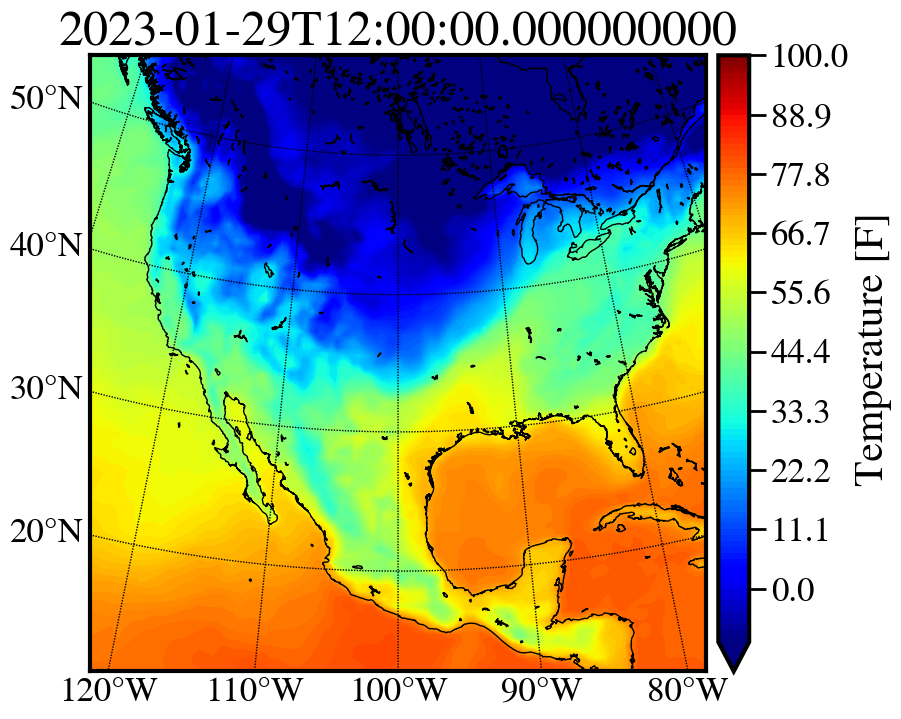

In [25]:
#norm = colors.Normalize(vmin=-10, vmax=100)
cs = m.contourf(xx,yy,temp.to('fahrenheit'),levels=np.linspace(-10,100,100),cmap=plt.cm.jet, extend='min')

m.colorbar(location='right',label='Temperature [F]')

m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,10.), labels=[1,0,0,0],fontsize=25)
m.drawmeridians(np.arange(0.,360.,10.), labels=[0,0,0,1],fontsize=25)
plt.title(test.TMP.refDate.data
         )
plt.show()

In [26]:
test.TMP.dims

('leadTime', 'valueOfFirstFixedSurface', 'y', 'x')

In [30]:
test.var

<bound method DatasetAggregations.var of <xarray.Dataset>
Dimensions:                   (leadTime: 65, valueOfFirstFixedSurface: 3,
                               y: 361, x: 720)
Coordinates:
    refDate                   datetime64[ns] 2023-01-29T12:00:00
  * leadTime                  (leadTime) timedelta64[ns] 0 days 00:00:00 ... ...
  * valueOfFirstFixedSurface  (valueOfFirstFixedSurface) float64 2.0 80.0 100.0
    perturbationNumber        int64 ...
    latitude                  (y, x) float64 90.0 90.0 90.0 ... -90.0 -90.0
    longitude                 (y, x) float64 0.0 0.5 1.0 ... 358.5 359.0 359.5
    validDate                 (leadTime) datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    TMP                       (leadTime, valueOfFirstFixedSurface, y, x) float32 ...
Attributes:
    engine:   grib2io>

In [45]:
import metpy.calc as mpcalc

In [46]:
t = mpcalc.dewpoint_from_relative_humidity?

Signature: mpcalc.dewpoint_from_relative_humidity(temperature, relative_humidity)
Docstring:
Calculate the ambient dewpoint given air temperature and relative humidity.

Parameters
----------
temperature : `pint.Quantity`
    Air temperature

relative_humidity : `pint.Quantity`
    Relative humidity expressed as a ratio in the range 0 < relative_humidity <= 1

Returns
-------
`pint.Quantity`
    Dewpoint temperature

Examples
--------
>>> from metpy.calc import dewpoint_from_relative_humidity
>>> from metpy.units import units
>>> dewpoint_from_relative_humidity(10 * units.degC, 50 * units.percent)
<Quantity(0.0536760815, 'degree_Celsius')>

.. versionchanged:: 1.0
   Renamed ``rh`` parameter to ``relative_humidity``

See Also
--------
dewpoint, saturation_vapor_pressure
File:      /scratch2/STI/mdl-sti/Sidney.Lower/miniforge3/lib/python3.10/site-packages/metpy/calc/thermo.py
Type:      function

In [48]:
test.data_vars

Data variables:
    4LFTX    (leadTime, y, x) float32 ...
    CAPE     (leadTime, y, x) float32 ...
    CIN      (leadTime, y, x) float32 ...
    CNWAT    (leadTime, y, x) float32 ...
    CPOFP    (leadTime, y, x) float32 ...
    FLDCP    (leadTime, y, x) float32 ...
    FRICV    (leadTime, y, x) float32 ...
    GUST     (leadTime, y, x) float32 ...
    HGT      (leadTime, y, x) float32 ...
    HINDEX   (leadTime, y, x) float32 ...
    HPBL     (leadTime, y, x) float32 ...
    ICEC     (leadTime, y, x) float32 ...
    ICETK    (leadTime, y, x) float32 ...
    LAND     (leadTime, y, x) float32 ...
    LFT X    (leadTime, y, x) float32 ...
    PEVPR    (leadTime, y, x) float32 ...
    PRES     (leadTime, y, x) float32 ...
    SFCR     (leadTime, y, x) float32 ...
    SNOD     (leadTime, y, x) float32 ...
    SUNSD    (leadTime, y, x) float32 ...
    TMP      (leadTime, y, x) float32 ...
    VIS      (leadTime, y, x) float32 ...
    WEASD    (leadTime, y, x) float32 ...
    WILT     (lead

In [52]:
type(test.TMP)

xarray.core.dataarray.DataArray

In [53]:
rh = xr.zeros_like(test.TMP)

In [79]:
rh_dat = rh.data + 80

In [64]:
from metpy.units import units

In [84]:
temp_mp = test.TMP.data * units.kelvin
rh_mp = rh_dat * units.percent

In [85]:
t = mpcalc.dewpoint_from_relative_humidity(temp_mp[0], rh_mp[0])

In [86]:
t.to('fahrenheit')

Magnitude,[[-27.989316940307617 -27.989316940307617 -27.989316940307617 ... -27.989316940307617 -27.989316940307617 -27.989316940307617] [-28.341510772705078 -28.341510772705078 -28.341510772705078 ... -28.341510772705078 -28.341510772705078 -28.341510772705078] [-27.461040496826172 -27.461040496826172 -27.461040496826172 ... -27.461040496826172 -27.461040496826172 -27.461040496826172] ... [-31.51164436340332 -31.51164436340332 -31.51164436340332 ... -31.51164436340332 -31.51164436340332 -31.51164436340332] [-32.92074966430664 -32.92074966430664 -32.92074966430664 ... -32.92074966430664 -32.92074966430664 -32.92074966430664] [-33.09688949584961 -33.09688949584961 -33.09688949584961 ... -33.09688949584961 -33.09688949584961 -33.09688949584961]]
Units,degree_Fahrenheit


TypeError: 'memoryview' object is not callable

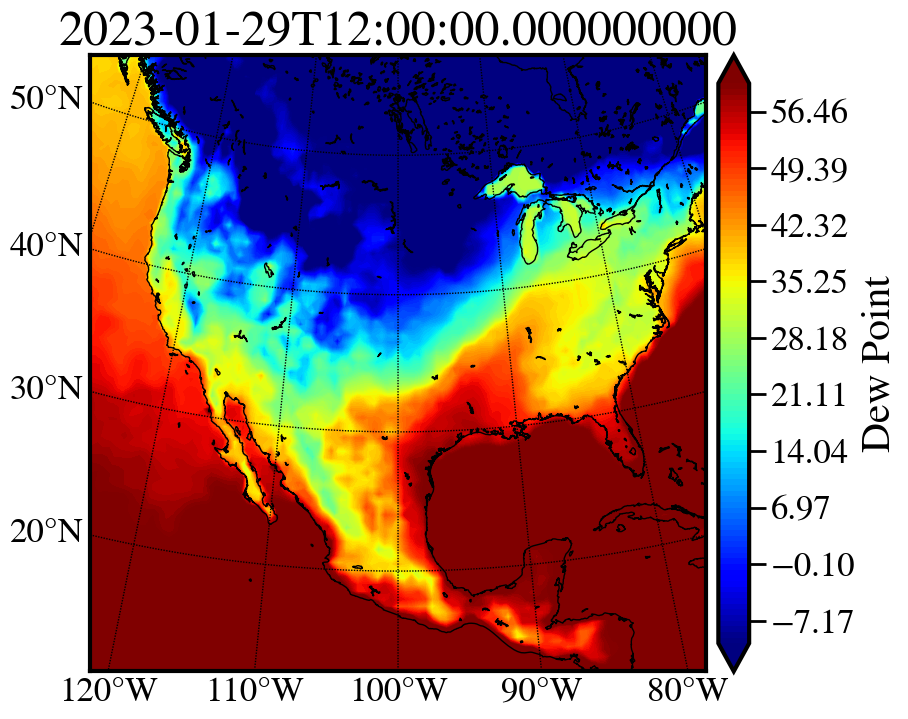

In [90]:
#norm = colors.Normalize(vmin=-10, vmax=100)
cs = m.contourf(xx,yy,t.to('fahrenheit'),levels=np.linspace(-10,60,100),cmap=plt.cm.jet, extend='both')

m.colorbar(location='right',label='Dew Point')

m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,10.), labels=[1,0,0,0],fontsize=25)
m.drawmeridians(np.arange(0.,360.,10.), labels=[0,0,0,1],fontsize=25)
plt.title(test.TMP.refDate.data
         )
plt.show()

In [76]:
np.shape(t)

(65, 361, 720)